In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
# functions

%matplotlib inline
import matplotlib.pyplot as plt

import datetime
import time

from scipy.stats import chi2_contingency, ttest_ind ,chisquare, kruskal, pearsonr

In [2]:
def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [6]:
dataset = pd.read_csv('steam_reviews.csv', header='infer',
nrows=1000000,
parse_dates=['timestamp_created',
'timestamp_updated', 'author.last_played'],
date_parser=dateparse)

In [7]:
dataset


,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,4000,Garry's Mod,71813587,russian,Игра классная но иногда надо делать перерывы),2020-07-01 15:22:55,2020-07-01 15:22:55,True,0,...,True,False,False,76561198998553816,8,4,11407.0,0.0,6384.0,2020-12-31 18:45:53
999996,999997,4000,Garry's Mod,71813556,english,I mean it's a game,2020-07-01 15:22:16,2020-07-01 15:22:16,True,0,...,True,False,False,76561198262900710,76,14,7129.0,0.0,6933.0,2020-12-12 17:40:30
999997,999998,4000,Garry's Mod,71813511,english,.,2020-07-01 15:21:39,2020-07-01 15:21:39,True,0,...,True,False,False,76561199053527564,3,1,566.0,0.0,490.0,2020-07-01 19:52:44
999998,999999,4000,Garry's Mod,71813331,swedish,"Ofc its a great game, facepunch made it, lol?",2020-07-01 15:19:10,2020-07-01 15:19:10,True,0,...,True,False,False,76561198201005063,147,23,1685.0,0.0,509.0,2020-07-19 12:03:46


In [20]:
dataset.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

<AxesSubplot:>

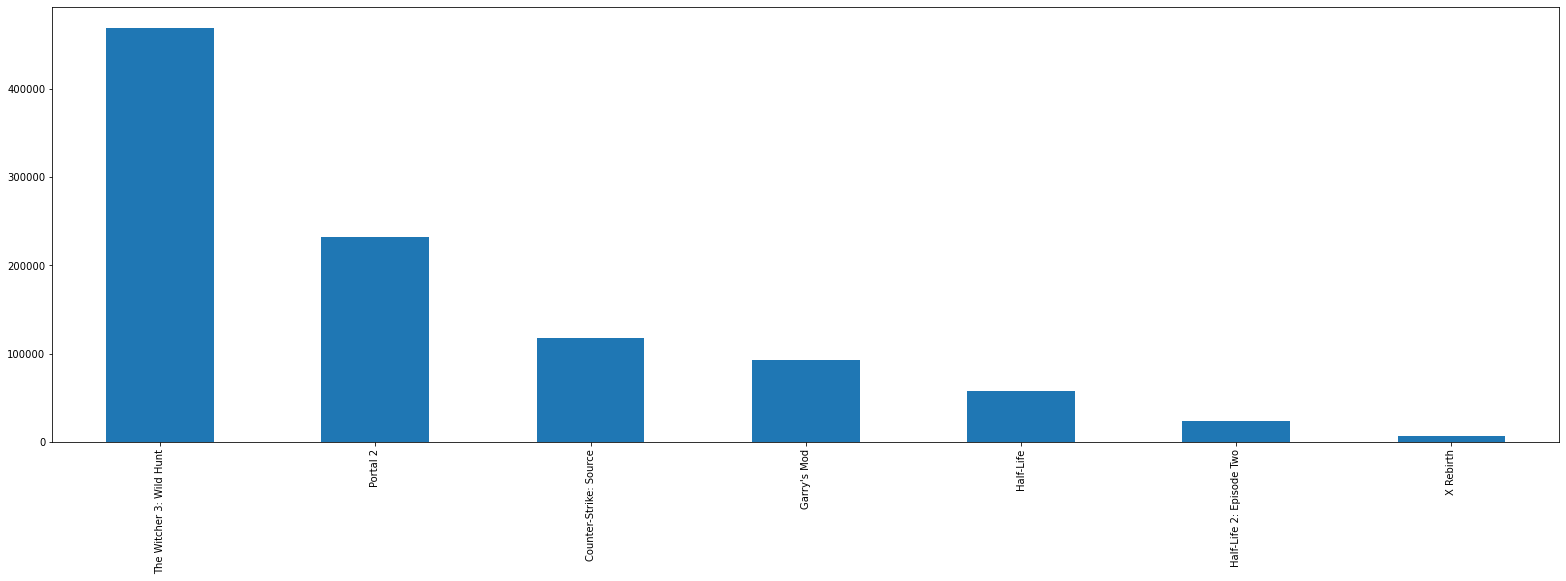

In [17]:
dataset['app_name'].value_counts().plot.bar(figsize = (27,8))

In [18]:
dataset.groupby('app_name')['recommended'].value_counts()

app_name                  recommended
Counter-Strike: Source    True           113430
                          False            4651
Garry's Mod               True            89588
                          False            2786
Half-Life                 True            55312
                          False            2008
Half-Life 2: Episode Two  True            22704
                          False             796
Portal 2                  True           229470
                          False            2859
The Witcher 3: Wild Hunt  True           460252
                          False            9143
X Rebirth                 False            4031
                          True             2970
Name: recommended, dtype: int64

In [16]:
dataset.groupby('app_name').recommended.sum()

app_name
Counter-Strike: Source      113430
Garry's Mod                  89588
Half-Life                    55312
Half-Life 2: Episode Two     22704
Portal 2                    229470
The Witcher 3: Wild Hunt    460252
X Rebirth                     2970
Name: recommended, dtype: int64

In [21]:
dataset[dataset['app_name']=="The Witcher 3: Wild Hunt"]['received_for_free'].value_counts()

False    463647
True       5748
Name: received_for_free, dtype: int64

In [22]:
dataset[dataset['app_name']=="Counter-Strike: Source"]['received_for_free'].value_counts()

False    112999
True       5082
Name: received_for_free, dtype: int64

<AxesSubplot:>

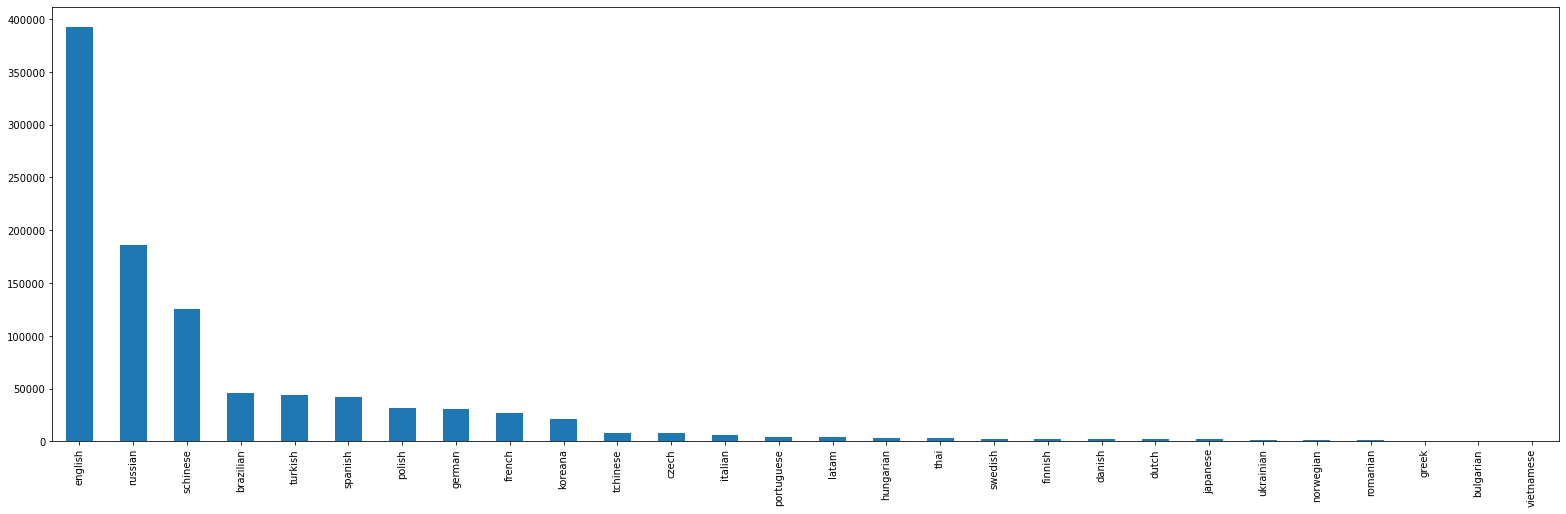

In [27]:
dataset['language'].value_counts().plot.bar(figsize = (27,8))

In [62]:
def filter_by_language(my_dataset, language_list):
    new_dataset = my_dataset[my_dataset['language'].isin(language_list)]
    return new_dataset

In [63]:
language_list = ['english', 'russian', 'schinese']
filt_ds = filter_by_language(dataset,language_list)

In [81]:
vfn= filt_ds[filt_ds['votes_funny'] != 0].shape[0] #number of reviews with a funny vote number greater than 0

vote_funny_percentage = vfn/filt_ds.shape[0]
print(vote_funny_percentage)

0.09688186971294103


In [83]:
vhn= filt_ds[filt_ds['votes_helpful'] != 0].shape[0] #number of reviews with a funny vote number greater than 0

vote_helpful_percentage = vhn/filt_ds.shape[0]
print(vote_helpful_percentage)

0.2613812537035169
